In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 전처리 (이상치 제거)

In [173]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/타격결과_속도_각도.csv',encoding='utf-8',index_col=0)
df

,HIT_VEL,HIT_ANG_VER,HIT_RESULT
0,131.50,42.7,14
1,135.18,9.9,1
2,152.41,2.1,1
3,113.72,13.5,1
4,54.11,16.4,7
...,...,...,...
17959,141.23,-4.9,5
17960,101.09,31.8,1
17961,146.84,33.4,15
17962,146.12,23.9,15


In [174]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx


In [175]:
def remove_out(new_df):
    
    outlier_idx = get_outlier(df=new_df, column='HIT_VEL', weight=1.5)
    print(len(outlier_idx))
    new_df.drop(outlier_idx, axis=0, inplace=True)
    print(new_df.shape)
    outlier_idx2 = get_outlier(df=new_df, column='HIT_ANG_VER', weight=1.5)
    print(len(outlier_idx2))
    new_df.drop(outlier_idx2, axis=0, inplace=True)
    print(new_df.shape)

    return new_df

In [176]:
df1 = df.loc[df['HIT_RESULT']==1]
df2 = df.loc[df['HIT_RESULT']==2]
df3 = df.loc[df['HIT_RESULT']==3]
df4 = df.loc[df['HIT_RESULT']==4]
df5 = df.loc[df['HIT_RESULT']==5]
df6 = df.loc[df['HIT_RESULT']==6]
df7 = df.loc[df['HIT_RESULT']==7]
df8 = df.loc[df['HIT_RESULT']==8]
df9 = df.loc[df['HIT_RESULT']==9]
df10 = df.loc[df['HIT_RESULT']==10]
df11 = df.loc[df['HIT_RESULT']==11]
df12 = df.loc[df['HIT_RESULT']==12]
df13 = df.loc[df['HIT_RESULT']==13]
df14 = df.loc[df['HIT_RESULT']==14]
df15 = df.loc[df['HIT_RESULT']==15]
df16 = df.loc[df['HIT_RESULT']==16]
df17 = df.loc[df['HIT_RESULT']==17]

In [177]:
df1 = remove_out(df1)
df2 = remove_out(df2)
df3 = remove_out(df3)
df4 = remove_out(df4)
df5 = remove_out(df5)
df6 = remove_out(df6)
df7 = remove_out(df7)
df8 = remove_out(df8)
df9 = remove_out(df9)
df10 = remove_out(df10)
df11 = remove_out(df11)
df12 = remove_out(df12)
df13 = remove_out(df13)
df14 = remove_out(df14)
df15 = remove_out(df15)
df16 = remove_out(df16)
df17 = remove_out(df17)

82
(29098, 3)
871
(27693, 3)
437
(7625, 3)
280
(7300, 3)
30
(642, 3)
11
(631, 3)
41
(1767, 3)
64
(1701, 3)
167
(26237, 3)
625
(25276, 3)
3
(41, 3)
1
(40, 3)
0
(48, 3)
2
(46, 3)
16
(3069, 3)
53
(3014, 3)
0
(2, 3)
0
(2, 3)
0
(52, 3)
3
(49, 3)
1
(330, 3)
19
(311, 3)
48
(3549, 3)
3
(3545, 3)
70
(4023, 3)
115
(3896, 3)
1219
(34421, 3)
0
(34421, 3)
22
(4709, 3)
45
(4660, 3)
9
(229, 3)
3
(226, 3)
8
(1595, 3)
0
(1595, 3)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [178]:
df_merge = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17])
df_merge

,HIT_VEL,HIT_ANG_VER,HIT_RESULT
1,135.18,9.9,1
2,152.41,2.1,1
3,113.72,13.5,1
5,161.90,3.5,1
8,154.95,0.8,1
...,...,...,...
17664,129.42,45.9,17
17678,130.68,20.8,17
17763,131.22,24.5,17
17793,128.32,27.8,17


In [179]:
df_merge.to_csv('이상치제거_타격결과_속도_각도.csv',encoding='utf-8')

## 배럴 기준 정의


타구 각도와 타구 속도 이상치 제거함 (HIT_VEL > 185)

In [180]:
df_result = pd.read_csv("/content/drive/MyDrive/빅콘테스트/data/이상치제거_타격결과_속도_각도.csv", encoding='utf-8', index_col=0)
df_result

,HIT_VEL,HIT_ANG_VER,HIT_RESULT
1,135.18,9.9,1
2,152.41,2.1,1
3,113.72,13.5,1
5,161.90,3.5,1
8,154.95,0.8,1
...,...,...,...
17664,129.42,45.9,17
17678,130.68,20.8,17
17763,131.22,24.5,17
17793,128.32,27.8,17


In [181]:
df_result.groupby('HIT_RESULT').count()

,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
1,27692,27692
2,7300,7300
3,631,631
4,1701,1701
5,25275,25275
6,40,40
7,46,46
8,3014,3014
9,2,2


HIT_VEL 80 ~ 200
HIT_ANG_VER -25 ~ 75

범위를 지정하여 5단위씩 그룹화 진행

해당 그룹에 존재하는 타구 결과를 토대로 타율과 장타율을 구함.

In [182]:
def get_타율(df_result_hr):
  total = df_result_hr.shape[0]
  hit = df_result_hr[(df_result_hr['HIT_RESULT'] == 1) | (df_result_hr['HIT_RESULT'] == 2) | (df_result_hr['HIT_RESULT'] == 3) | (df_result_hr['HIT_RESULT'] == 4) | (df_result_hr['HIT_RESULT'] == 15)].shape[0]
  if total != 0:
    return hit / total
  else:
    return 0

In [183]:
def get_장타율(df_result_hr):
  total = df_result_hr.shape[0]
  hit = df_result_hr[(df_result_hr['HIT_RESULT'] == 1) | (df_result_hr['HIT_RESULT'] == 4)].shape[0] + (2 * (df_result_hr[(df_result_hr['HIT_RESULT'] == 2)].shape[0])) + (3 * (df_result_hr[(df_result_hr['HIT_RESULT'] == 3)].shape[0])) + (4 * (df_result_hr[(df_result_hr['HIT_RESULT'] == 15)].shape[0]))
  if total != 0:
    return hit / total
  else:
    return 0

In [184]:
속도범위 = []
각도범위 = []
타율 = []
장타율 = []

HIT_VEL_min = 80
for i in range(24):
  HIT_VEL_min2 = HIT_VEL_min + 5
  HIT_ANG_VER_min = -25
  for j in range(20):
    HIT_ANG_VER_min2 = HIT_ANG_VER_min + 5
    속도범위.append(str(HIT_VEL_min) + "~" + str(HIT_VEL_min2))
    각도범위.append(str(HIT_ANG_VER_min) + "~" + str(HIT_ANG_VER_min2))
    df_result_hr1 = df_result[(df_result['HIT_VEL'] >= HIT_VEL_min) & (df_result['HIT_VEL'] < HIT_VEL_min2) & (df_result['HIT_ANG_VER'] >= HIT_ANG_VER_min) & (df_result['HIT_ANG_VER'] < HIT_ANG_VER_min2)]
    타율.append(get_타율(df_result_hr1))
    장타율.append(get_장타율(df_result_hr1))
    HIT_ANG_VER_min += 5
  HIT_VEL_min += 5
print(속도범위)
print(각도범위)
print(타율)
print(장타율)

['80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '80~85', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '85~90', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '90~95', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '95~100', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '100~105', '105~110', '105~110', '105~110', '105~1

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Take a dictionary as input to your DataFrame 
df_hit_타율 = {"속도범위": 속도범위, "각도범위": 각도범위, "타율": 타율}
df_hit_장타율 = {"속도범위": 속도범위, "각도범위": 각도범위, "장타율": 장타율}

display(pd.DataFrame(df_hit_타율))
display(pd.DataFrame(df_hit_장타율))
print(type(속도범위))


,속도범위,각도범위,타율
0,80~85,-25~-20,0.062500
1,80~85,-20~-15,0.027027
2,80~85,-15~-10,0.032787
3,80~85,-10~-5,0.027027
4,80~85,-5~0,0.052632
...,...,...,...
475,195~200,50~55,0.000000
476,195~200,55~60,0.000000
477,195~200,60~65,0.000000
478,195~200,65~70,0.000000


,속도범위,각도범위,장타율
0,80~85,-25~-20,0.062500
1,80~85,-20~-15,0.027027
2,80~85,-15~-10,0.032787
3,80~85,-10~-5,0.027027
4,80~85,-5~0,0.052632
...,...,...,...
475,195~200,50~55,0.000000
476,195~200,55~60,0.000000
477,195~200,60~65,0.000000
478,195~200,65~70,0.000000


<class 'list'>


In [187]:
df1 = pd.DataFrame(df_hit_타율)
df2 = pd.DataFrame(df_hit_장타율)

df = pd.merge(df1, df2, on=['속도범위', '각도범위'])
print(df)

        속도범위     각도범위        타율       장타율
0      80~85  -25~-20  0.062500  0.062500
1      80~85  -20~-15  0.027027  0.027027
2      80~85  -15~-10  0.032787  0.032787
3      80~85   -10~-5  0.027027  0.027027
4      80~85     -5~0  0.052632  0.052632
..       ...      ...       ...       ...
475  195~200    50~55  0.000000  0.000000
476  195~200    55~60  0.000000  0.000000
477  195~200    60~65  0.000000  0.000000
478  195~200    65~70  0.000000  0.000000
479  195~200    70~75  0.000000  0.000000

[480 rows x 4 columns]


In [188]:
pd.DataFrame(df_hit_타율).to_csv('/content/drive/MyDrive/빅콘테스트/속도범위_각도범위_타율.csv',encoding='utf-8')
pd.DataFrame(df_hit_장타율).to_csv('/content/drive/MyDrive/빅콘테스트/속도범위_각도범위_장타율.csv',encoding='utf-8')

In [189]:
! pip install pandas==1.3.0

In [190]:
import pandas as pd

타구 각도 / 속도별 타율 장타율 시각화

In [191]:
table = pd.pivot_table(pd.DataFrame(df_hit_타율), values='타율', index=['각도범위'],columns=['속도범위'], sort=False)
table

속도범위,100~105,105~110,110~115,115~120,120~125,125~130,130~135,135~140,140~145,145~150,150~155,155~160,160~165,165~170,170~175,175~180,180~185,185~190,190~195,195~200,80~85,85~90,90~95,95~100
각도범위,,,,,,,,,,,,,,,,,,,,,,,,
-25~-20,0.010101,0.011765,0.056180,0.023810,0.061856,0.040650,0.022222,0.029412,0.037975,0.049180,0.027027,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.062500,0.038835,0.079646,0.035088
-20~-15,0.117117,0.073298,0.058480,0.065934,0.055838,0.083721,0.126050,0.113402,0.195584,0.230263,0.227848,0.239130,0.268657,0.352941,0.000000,0.000000,0.0,0.0,0.0,0.0,0.027027,0.044776,0.149171,0.102564
-15~-10,0.099138,0.123418,0.132203,0.111111,0.101351,0.125714,0.168203,0.166352,0.203333,0.223988,0.257329,0.326882,0.332130,0.386555,0.440000,0.800000,0.0,0.0,0.0,0.0,0.032787,0.025316,0.094340,0.108808
-10~-5,0.056277,0.095847,0.086835,0.115942,0.107728,0.192982,0.240901,0.239377,0.294513,0.279115,0.350940,0.384454,0.390244,0.391304,0.381579,0.333333,0.0,0.0,0.0,0.0,0.027027,0.061224,0.054054,0.074380
-5~0,0.069892,0.089888,0.149254,0.184492,0.234440,0.287004,0.352227,0.394855,0.408021,0.450000,0.488975,0.512138,0.527778,0.563177,0.587302,0.857143,0.0,0.0,0.0,0.0,0.052632,0.000000,0.072464,0.033058
0~5,0.124260,0.228571,0.272059,0.316239,0.359629,0.391566,0.467890,0.550186,0.573218,0.615905,0.639294,0.670719,0.654255,0.686567,0.722222,0.666667,0.0,0.0,0.0,0.0,0.080000,0.035714,0.076923,0.115789
5~10,0.187500,0.321267,0.386760,0.459677,0.496471,0.567029,0.615491,0.680233,0.754021,0.794953,0.820000,0.825871,0.840580,0.882353,0.896552,1.000000,0.0,0.0,0.0,0.0,0.037037,0.027778,0.111111,0.237288
10~15,0.379518,0.526066,0.596875,0.766854,0.863535,0.925550,0.964029,0.939954,0.905075,0.871336,0.803966,0.790437,0.779264,0.811321,0.863636,1.000000,0.0,0.0,0.0,0.0,0.102564,0.061224,0.166667,0.234043
15~20,0.748201,0.881517,0.959108,0.975831,0.918860,0.771993,0.620957,0.450855,0.415129,0.401667,0.475196,0.601820,0.670498,0.743455,0.903226,1.000000,0.0,0.0,0.0,0.0,0.833333,0.900000,0.460000,0.561905


In [192]:
# heatmap by plt.pcolor()

table.style.background_gradient(cmap='summer')

속도범위,100~105,105~110,110~115,115~120,120~125,125~130,130~135,135~140,140~145,145~150,150~155,155~160,160~165,165~170,170~175,175~180,180~185,185~190,190~195,195~200,80~85,85~90,90~95,95~100
각도범위,,,,,,,,,,,,,,,,,,,,,,,,
-25~-20,0.010101,0.011765,0.056180,0.023810,0.061856,0.040650,0.022222,0.029412,0.037975,0.049180,0.027027,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.038835,0.079646,0.035088
-20~-15,0.117117,0.073298,0.058480,0.065934,0.055838,0.083721,0.126050,0.113402,0.195584,0.230263,0.227848,0.239130,0.268657,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.044776,0.149171,0.102564
-15~-10,0.099138,0.123418,0.132203,0.111111,0.101351,0.125714,0.168203,0.166352,0.203333,0.223988,0.257329,0.326882,0.332130,0.386555,0.440000,0.800000,0.000000,0.000000,0.000000,0.000000,0.032787,0.025316,0.094340,0.108808
-10~-5,0.056277,0.095847,0.086835,0.115942,0.107728,0.192982,0.240901,0.239377,0.294513,0.279115,0.350940,0.384454,0.390244,0.391304,0.381579,0.333333,0.000000,0.000000,0.000000,0.000000,0.027027,0.061224,0.054054,0.074380
-5~0,0.069892,0.089888,0.149254,0.184492,0.234440,0.287004,0.352227,0.394855,0.408021,0.450000,0.488975,0.512138,0.527778,0.563177,0.587302,0.857143,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.072464,0.033058
0~5,0.124260,0.228571,0.272059,0.316239,0.359629,0.391566,0.467890,0.550186,0.573218,0.615905,0.639294,0.670719,0.654255,0.686567,0.722222,0.666667,0.000000,0.000000,0.000000,0.000000,0.080000,0.035714,0.076923,0.115789
5~10,0.187500,0.321267,0.386760,0.459677,0.496471,0.567029,0.615491,0.680233,0.754021,0.794953,0.820000,0.825871,0.840580,0.882353,0.896552,1.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.027778,0.111111,0.237288
10~15,0.379518,0.526066,0.596875,0.766854,0.863535,0.925550,0.964029,0.939954,0.905075,0.871336,0.803966,0.790437,0.779264,0.811321,0.863636,1.000000,0.000000,0.000000,0.000000,0.000000,0.102564,0.061224,0.166667,0.234043
15~20,0.748201,0.881517,0.959108,0.975831,0.918860,0.771993,0.620957,0.450855,0.415129,0.401667,0.475196,0.601820,0.670498,0.743455,0.903226,1.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.900000,0.460000,0.561905


In [193]:
table2 = pd.pivot_table(pd.DataFrame(df_hit_장타율), values='장타율', index=['각도범위'],columns=['속도범위'], sort=False)
table2

속도범위,100~105,105~110,110~115,115~120,120~125,125~130,130~135,135~140,140~145,145~150,150~155,155~160,160~165,165~170,170~175,175~180,180~185,185~190,190~195,195~200,80~85,85~90,90~95,95~100
각도범위,,,,,,,,,,,,,,,,,,,,,,,,
-25~-20,0.010101,0.011765,0.056180,0.023810,0.061856,0.040650,0.022222,0.029412,0.037975,0.049180,0.027027,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.062500,0.038835,0.079646,0.035088
-20~-15,0.117117,0.073298,0.058480,0.065934,0.055838,0.083721,0.126050,0.113402,0.195584,0.230263,0.227848,0.239130,0.268657,0.352941,0.000000,0.000000,0.0,0.0,0.0,0.0,0.027027,0.044776,0.149171,0.102564
-15~-10,0.099138,0.123418,0.132203,0.111111,0.101351,0.125714,0.168203,0.166352,0.203333,0.223988,0.257329,0.326882,0.332130,0.386555,0.440000,0.800000,0.0,0.0,0.0,0.0,0.032787,0.025316,0.094340,0.108808
-10~-5,0.056277,0.095847,0.086835,0.115942,0.107728,0.192982,0.240901,0.239377,0.294513,0.282002,0.350940,0.385504,0.390244,0.391304,0.394737,0.333333,0.0,0.0,0.0,0.0,0.027027,0.061224,0.054054,0.074380
-5~0,0.069892,0.089888,0.149254,0.187166,0.242739,0.319495,0.376518,0.430649,0.444638,0.491667,0.523346,0.559123,0.573611,0.606498,0.682540,0.857143,0.0,0.0,0.0,0.0,0.052632,0.000000,0.072464,0.033058
0~5,0.124260,0.228571,0.272059,0.324786,0.389791,0.423695,0.513761,0.597274,0.632948,0.652284,0.685342,0.723404,0.705674,0.756219,0.722222,1.000000,0.0,0.0,0.0,0.0,0.080000,0.035714,0.076923,0.115789
5~10,0.187500,0.321267,0.386760,0.465054,0.520000,0.608696,0.680498,0.760465,0.836329,0.896688,0.955385,0.983085,1.038043,1.117647,1.206897,1.250000,0.0,0.0,0.0,0.0,0.037037,0.027778,0.111111,0.237288
10~15,0.379518,0.526066,0.596875,0.769663,0.928412,0.991540,1.056115,1.057737,1.078008,1.074919,1.077803,1.100712,1.152174,1.250000,1.204545,2.000000,0.0,0.0,0.0,0.0,0.102564,0.061224,0.166667,0.234043
15~20,0.748201,0.881517,0.959108,0.987915,0.982456,0.861759,0.742561,0.617521,0.657749,0.715833,0.899913,1.171786,1.455939,1.926702,2.193548,2.250000,0.0,0.0,0.0,0.0,0.833333,0.900000,0.460000,0.561905


In [194]:
table2.style.background_gradient(cmap='summer')

속도범위,100~105,105~110,110~115,115~120,120~125,125~130,130~135,135~140,140~145,145~150,150~155,155~160,160~165,165~170,170~175,175~180,180~185,185~190,190~195,195~200,80~85,85~90,90~95,95~100
각도범위,,,,,,,,,,,,,,,,,,,,,,,,
-25~-20,0.010101,0.011765,0.056180,0.023810,0.061856,0.040650,0.022222,0.029412,0.037975,0.049180,0.027027,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.038835,0.079646,0.035088
-20~-15,0.117117,0.073298,0.058480,0.065934,0.055838,0.083721,0.126050,0.113402,0.195584,0.230263,0.227848,0.239130,0.268657,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.044776,0.149171,0.102564
-15~-10,0.099138,0.123418,0.132203,0.111111,0.101351,0.125714,0.168203,0.166352,0.203333,0.223988,0.257329,0.326882,0.332130,0.386555,0.440000,0.800000,0.000000,0.000000,0.000000,0.000000,0.032787,0.025316,0.094340,0.108808
-10~-5,0.056277,0.095847,0.086835,0.115942,0.107728,0.192982,0.240901,0.239377,0.294513,0.282002,0.350940,0.385504,0.390244,0.391304,0.394737,0.333333,0.000000,0.000000,0.000000,0.000000,0.027027,0.061224,0.054054,0.074380
-5~0,0.069892,0.089888,0.149254,0.187166,0.242739,0.319495,0.376518,0.430649,0.444638,0.491667,0.523346,0.559123,0.573611,0.606498,0.682540,0.857143,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.072464,0.033058
0~5,0.124260,0.228571,0.272059,0.324786,0.389791,0.423695,0.513761,0.597274,0.632948,0.652284,0.685342,0.723404,0.705674,0.756219,0.722222,1.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.035714,0.076923,0.115789
5~10,0.187500,0.321267,0.386760,0.465054,0.520000,0.608696,0.680498,0.760465,0.836329,0.896688,0.955385,0.983085,1.038043,1.117647,1.206897,1.250000,0.000000,0.000000,0.000000,0.000000,0.037037,0.027778,0.111111,0.237288
10~15,0.379518,0.526066,0.596875,0.769663,0.928412,0.991540,1.056115,1.057737,1.078008,1.074919,1.077803,1.100712,1.152174,1.250000,1.204545,2.000000,0.000000,0.000000,0.000000,0.000000,0.102564,0.061224,0.166667,0.234043
15~20,0.748201,0.881517,0.959108,0.987915,0.982456,0.861759,0.742561,0.617521,0.657749,0.715833,0.899913,1.171786,1.455939,1.926702,2.193548,2.250000,0.000000,0.000000,0.000000,0.000000,0.833333,0.900000,0.460000,0.561905


In [195]:
df_result

,HIT_VEL,HIT_ANG_VER,HIT_RESULT
1,135.18,9.9,1
2,152.41,2.1,1
3,113.72,13.5,1
5,161.90,3.5,1
8,154.95,0.8,1
...,...,...,...
17664,129.42,45.9,17
17678,130.68,20.8,17
17763,131.22,24.5,17
17793,128.32,27.8,17


KBO 상위 성적으로 타율과 장타율 후보 기준들을 토대로 상위 선수의 배럴 타구 확률 기준을 mlb 기준인 20 ~ 25% 기준에 부합하는 새로운 배럴 타구의 타율, 장타율 기준을 설정하였다.


타율 : 0.644101

장타율 : 0.814623

위 기준에 더해 최소 속도를 배럴 타구 기준에 추가하였음.


  **최소 속도 기준 **
  
  배럴 타구의 경우 대부분 타율 / 장타율에 대한 기준만 존재하진 않고 최소 속도 기준이 존재하기 때문에 타율의 변화가 가장 급격한 구간을 배럴의 최소 기준으로 추가 정의하였음. 1단위로 속도별 장타율 결과를 line chart로 표현한 후 장타율의 변화가 가장 큰 구간을 최소 속도 기준으로 정하였다. 
  -> 135




In [196]:
속도 = []
장타율 = []
타율 = []
min = int(df_result["HIT_VEL"].min())
max = int(df_result["HIT_VEL"].max())
for i in range(min, max):
  df_temp = df_result[(df_result["HIT_VEL"] >= i) & (df_result["HIT_VEL"] < i + 1)]
  속도.append(i)
  장타율.append(get_장타율(df_temp))
  타율.append(get_타율(df_temp))

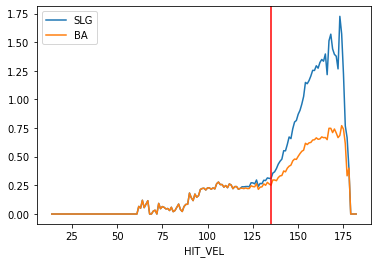

In [197]:
data = {'HIT_VEL': 속도,
        'SLG': 장타율,
        'BA': 타율}
  
df = pd.DataFrame(data,columns=['HIT_VEL','SLG', 'BA'])
df.plot(x ='HIT_VEL', y=['SLG', 'BA'], kind = 'line')
plt.axvline(x = 135, color = 'r', linestyle = '-')
plt.show()

In [198]:
dict_타율 = {}
for i in table.columns:
  if int(i.split('~')[1]) <= 135:
    continue
  타율_list = table.loc[table[i] >=  0.644101].index.tolist()
  list = []
  if len(타율_list) == 1:
    list.append(int(타율_list[0].split('~')[0]))
    list.append(int(타율_list[0].split('~')[1]))
  elif len(타율_list) >= 2:
    list.append(int(타율_list[0].split('~')[0]))
    list.append(int(타율_list[len(타율_list) - 1].split('~')[1]))
  else:
    continue
  dict_타율[i] = list
dict_타율

{'135~140': [5, 15],
 '140~145': [5, 15],
 '145~150': [5, 15],
 '150~155': [5, 30],
 '155~160': [0, 35],
 '160~165': [0, 40],
 '165~170': [0, 40],
 '170~175': [0, 40],
 '175~180': [-15, 35]}

In [199]:
dict_장타율 = {}
for i in table2.columns:
  if int(i.split('~')[1]) <= 135:
    continue
  장타율_list = table2.loc[table2[i] >= 0.814623].index.tolist()
  list = []
  if len(장타율_list) == 1:
    list.append(int(장타율_list[0].split('~')[0]))
    list.append(int(장타율_list[0].split('~')[1]))
  elif len(장타율_list) >= 2:
    list.append(int(장타율_list[0].split('~')[0]))
    list.append(int(장타율_list[len(장타율_list) - 1].split('~')[1]))
  else:
    continue
  dict_장타율[i] = list
dict_장타율

{'135~140': [10, 15],
 '140~145': [5, 15],
 '145~150': [5, 35],
 '150~155': [5, 40],
 '155~160': [5, 45],
 '160~165': [5, 45],
 '165~170': [5, 45],
 '170~175': [5, 40],
 '175~180': [-5, 35]}

In [200]:
def check_타율(속도, 각도):
  for k, v in dict_타율.items():
    min = int(k.split("~")[0])
    max = int(k.split("~")[1])
    if (속도 >= min) & (속도 < max):
      if (각도 >= v[0]) & (각도 < v[1]):
        return True
  return False

In [201]:
def check_장타율(속도, 각도):
  for k, v in dict_장타율.items():
    min = int(k.split("~")[0])
    max = int(k.split("~")[1])
    if (속도 >= min) & (속도 < max):
      if (각도 >= v[0]) & (각도 < v[1]):
        return True
  return False

In [202]:
def check_barrel(속도, 각도):
  if check_타율(속도, 각도) and check_장타율(속도, 각도):
    return 1
  else:
    return 0

In [203]:
df1 = pd.read_csv("/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv", encoding='euc-kr')
df2 = pd.read_csv("/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv", encoding='euc-kr')
df3 = pd.read_csv("/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv", encoding='euc-kr')
df4 = pd.read_csv("/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv", encoding='euc-kr')
df = pd.DataFrame(pd.concat([df1,df2,df3,df4]))

In [204]:
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


실제로 mlb에서의 배럴 기준과 같이 상위 선수 (pcode = 67872)의 배럴 타구의 비율이 20-25% 인지 확인하였음

In [205]:
df_67872 = df[df["PCODE"] == 67872]
df_67872

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
150,2018,20180324LTSK0,180324_151726,67872,SK,3,135.97,-21.4,땅볼아웃,132.07,문학
379,2018,20180325LTSK0,180325_150945,67872,SK,4,122.41,-8.2,1루타,132.97,문학
384,2018,20180325LTSK0,180325_154318,67872,SK,5,156.47,33.3,플라이,133.17,문학
395,2018,20180325LTSK0,180325_162620,67872,SK,7,137.84,-19.2,땅볼아웃,131.35,문학
536,2018,20180327KTSK0,180327_204237,67872,SK,6,140.61,52.9,플라이,113.42,문학
...,...,...,...,...,...,...,...,...,...,...,...
17634,2021,20210709HHSK0,210709_215544,67872,SK,9,139.02,60.6,플라이,145.71,문학
17755,2021,20210710HHSK0,210710_183307,67872,SK,2,159.32,23.7,홈런,130.74,문학
17764,2021,20210710HHSK0,210710_191945,67872,SK,4,105.19,80.3,파울플라이,114.43,문학
17783,2021,20210710HHSK0,210710_211428,67872,SK,9,117.39,60.0,플라이,136.63,문학


In [206]:
barrel = []
for idx, row in df.iterrows():
    barrel.append(check_barrel(row['HIT_VEL'], row['HIT_ANG_VER']))

In [207]:
barrel_count = 0
for idx, row in df_67872.iterrows():
    barrel_count += check_barrel(row['HIT_VEL'], row['HIT_ANG_VER'])
barrel_percent_67872 = barrel_count / df_67872.shape[0]
print(barrel_percent_67872)

0.2396825396825397


20-25% 내의 배럴 타구 확률을 가지는 것을 알 수 있다.

In [208]:
df['BARREL'] = barrel
print(barrel)
df

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,BARREL
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0


구간 중 타율 , 장타율 기준에 미치지 않는 구간은 배럴 타구로 간주하지 않음.

In [209]:
df.loc[(df['HIT_VEL'] >= 150) & (df['HIT_VEL'] < 160) & (df['HIT_ANG_VER'] >= 15) & (df['HIT_ANG_VER'] < 20),'BARREL'] = 0

실제로 mlb에서의 배럴 기준과 같이 상위 선수의 배럴 타구의 비율이 20-25% 인지 확인하였음

In [210]:
df_groupby = df.groupby(['GYEAR','PCODE']).mean()
df_groupby

INN     HIT_VEL  HIT_ANG_VER     PIT_VEL    BARREL
GYEAR PCODE                                                         
2018  60100  5.597938  133.443196    26.607216  138.389897  0.154639
      60184  6.285714  137.428571    25.814286  131.865714  0.428571
      60288  8.000000   74.480000    -2.400000  149.910000  0.000000
      60343  5.476636  132.035327    22.157944  137.414019  0.140187
      60456  6.333333  114.366667     9.566667  132.675000  0.000000
...               ...         ...          ...         ...       ...
2021  79290  6.000000  130.472500    18.600000  143.297500  0.000000
      79365  4.446970  138.122803    18.375000  135.556136  0.189394
      79402  4.811429  132.975543    16.495429  136.928571  0.085714
      79456  6.010753  128.290323    10.256989  135.791075  0.064516
      79608  4.686747  137.182169    15.545783  134.524337  0.198795

[1065 rows x 5 columns]

In [211]:
df_groupby['BARREL_SUM'] = df.groupby(['GYEAR','PCODE']).sum()['BARREL']

In [212]:
df_groupby

INN     HIT_VEL  ...    BARREL  BARREL_SUM
GYEAR PCODE                        ...                      
2018  60100  5.597938  133.443196  ...  0.154639          15
      60184  6.285714  137.428571  ...  0.428571           3
      60288  8.000000   74.480000  ...  0.000000           0
      60343  5.476636  132.035327  ...  0.140187          15
      60456  6.333333  114.366667  ...  0.000000           0
...               ...         ...  ...       ...         ...
2021  79290  6.000000  130.472500  ...  0.000000           0
      79365  4.446970  138.122803  ...  0.189394          25
      79402  4.811429  132.975543  ...  0.085714          15
      79456  6.010753  128.290323  ...  0.064516           6
      79608  4.686747  137.182169  ...  0.198795          33

[1065 rows x 6 columns]

In [213]:
df_groupby.to_csv('/content/drive/MyDrive/빅콘테스트/년도_선수_배럴.csv',encoding='utf-8')

년도와 선수별로 선수의 배럴 컬럼을 추가